In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from larcv import larcv
%matplotlib inline

from tools import *

In [27]:
filename = '/Users/mdeltutt/Downloads/out_sbnd_3d_n5_r6_mb64_bpl2_nf32_lrstriangle_clr_classic_i1000.h5.pkl'
df_3d = pd.read_pickle(filename)

filename = '/Users/mdeltutt/Downloads/out_sbnd_2d_n5_r6_mb64_bpl2_nf32_lrstriangle_clr_classic_i600.h5.pkl'
df_2d = pd.read_pickle(filename)

In [44]:
def make_plots(name, signal_txt, var, str_sig, str_sig_sel, nbins, df_3d, df_2d):
    
    sig_df_3d = df_3d.query(str_sig)
    sig_sel_df_3d = df_3d.query(str_sig_sel)

    sig_df_2d = df_2d.query(str_sig)
    sig_sel_df_2d = df_2d.query(str_sig_sel)

    print ('Overall efficiency - 3D:', float(len(sig_sel_df_3d)) / len(sig_df_3d))
    print ('Overall efficiency - 2D:', float(len(sig_sel_df_2d)) / len(sig_df_2d))

    pot_scale_3d = pot_scale_factor(this_pot=np.sum(sig_df_3d['pot']))
    pot_scale_2d = pot_scale_factor(this_pot=np.sum(sig_df_2d['pot']))
    
    sig_df_3d = sig_df_3d.query(var.variable + ' > -9999')
    sig_sel_df_3d = sig_sel_df_3d.query(var.variable + ' > -9999')
    sig_df_2d = sig_df_2d.query(var.variable + ' > -9999')
    sig_sel_df_2d = sig_sel_df_2d.query(var.variable + ' > -9999')


    fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,11))

    # 3D - left

    bins, edges, _ = ax[0][0].hist([sig_df_3d[var.variable].values,sig_sel_df_3d[var.variable].values], histtype='step', lw=2, 
                                   color = ['#ff7f0e', '#2ca02c'], 
                                   label = ['Signal: '+signal_txt, 'Selected Signal'], 
                                   weights=[[pot_scale_3d]*len(sig_df_3d), [pot_scale_3d]*len(sig_sel_df_3d)],
                                   bins=nbins,
                                   range=[var.x_1, var.x_2])

    eff_3d, unc_low_3d, unc_up_3d, bins_3d, bins_mid_3d, unc_x_3d = efficiency(num=sig_sel_df_3d[var.variable].values, 
                                                             den=sig_df_3d[var.variable].values, 
                                                             num_w=[pot_scale_3d]*len(sig_sel_df_3d), 
                                                             den_w=[pot_scale_3d]*len(sig_df_3d), 
                                                             n_bins=nbins, 
                                                             limits=[var.x_1, var.x_2])

    tot_eff_3d = float(len(sig_sel_df_3d)) / len(sig_df_3d)
    tot_err_eff_3d = np.sqrt(float(len(sig_sel_df_3d))*(1-float(len(sig_sel_df_3d))/len(sig_df_3d)))/len(sig_df_3d)

    ax[1][0].errorbar(bins_mid_3d, eff_3d, 
                      yerr=[unc_low_3d, unc_up_3d], xerr=unc_x_3d,
                      fmt='o',
                      color='#d62728',
                      label='Efficiency = ({0:0.2f} $\\pm$ {1:0.2f})%'.format(tot_eff_3d, tot_err_eff_3d))

    if var.variable == 'lep_thetayz':
        ax[1][0].axvline(x=60)
        ax[1][0].axvline(x=-60)


    # 2D - right

    bins, edges, _ = ax[0][1].hist([sig_df_2d[var.variable],sig_sel_df_2d[var.variable]], histtype='step', lw=2, 
                                   color = ['#ff7f0e', '#2ca02c'], 
                                   label = ['Signal: '+signal_txt, 'Selected Signal'], 
                                   weights=[[pot_scale_2d]*len(sig_df_2d), [pot_scale_2d]*len(sig_sel_df_2d)],
                                   bins=nbins,
                                   range=[var.x_1, var.x_2])

    eff_2d, unc_low_2d, unc_up_2d, bins_2d, bins_mid_2d, unc_x_2d = efficiency(num=sig_sel_df_2d[var.variable].values, 
                                                             den=sig_df_2d[var.variable].values, 
                                                             num_w=[pot_scale_2d]*len(sig_sel_df_2d), 
                                                             den_w=[pot_scale_2d]*len(sig_df_2d), 
                                                             n_bins=nbins, 
                                                             limits=[var.x_1, var.x_2])

    tot_eff_2d = float(len(sig_sel_df_2d)) / len(sig_df_2d)
    tot_err_eff_2d = np.sqrt(float(len(sig_sel_df_2d))*(1-float(len(sig_sel_df_2d))/len(sig_df_2d)))/len(sig_df_2d)

    ax[1][1].errorbar(bins_mid_2d, eff_2d, 
                      yerr=[unc_low_2d, unc_up_2d], xerr=unc_x_2d,
                      fmt='o',
                      color='#d62728',
                      label='Efficiency = ({0:0.2f} $\\pm$ {1:0.2f})%'.format(tot_eff_2d, tot_err_eff_2d))


    if var.variable == 'lep_thetayz':
        ax[1][1].axvline(x=60)
        ax[1][1].axvline(x=-60)
        
        
    fsize = 22

    # Left settings

    ax[0][0].set_ylabel('Events / $1.0 \\times 10^{20}$ POT', fontsize=fsize) # nue
    # ax[0][0].set_ylabel('Events / $5.2 \\times 10^{19}$ POT', fontsize=fsize) # nue
    # ax[0][0].set_ylabel('Events / $4.5 \\times 10^{17}$ POT', fontsize=fsize) # numu

    ax[1][0].set_xlabel(var.xlabel, fontsize=fsize)
    ax[1][0].set_ylabel('Signal selection efficiency', fontsize=fsize)

    ax[0][0].tick_params(labelsize=20)
    ax[1][0].tick_params(labelsize=20)

    ax[0][0].legend(fontsize=18)
    ax[1][0].legend(fontsize=18, loc=3)
    ax[1][0].set_ylim(0,1)


    # Right settings

    ax[0][1].set_ylabel('Events / $1.0 \\times 10^{20}$ POT', fontsize=fsize) # nue
    # ax[0][1].set_ylabel('Events / $5.2 \\times 10^{19}$ POT', fontsize=fsize) # nue
    # ax[0][1].set_ylabel('Events / $4.5 \\times 10^{17}$ POT', fontsize=fsize) # numu

    ax[1][1].set_xlabel(var.xlabel, fontsize=fsize)
    ax[1][1].set_ylabel('Signal selection efficiency', fontsize=fsize)

    ax[0][1].tick_params(labelsize=20)
    ax[1][1].tick_params(labelsize=20)

    ax[0][1].legend(fontsize=18)
    ax[1][1].legend(fontsize=18, loc=3)
    ax[1][1].set_ylim(0,1)


    fig.tight_layout()

#     plt.savefig('plots_distributions/selected_events_efficiency_'+name+'_'+var.variable+'.pdf')
#     plt.show()
    
    
    
    
#     fig = plt.figure(figsize=(9,8),facecolor='w')

    ax[0][2].errorbar(bins_mid_3d, eff_3d, 
                      yerr=[unc_low_3d, unc_up_3d], xerr=unc_x_3d,
                      fmt='o',
                      label='3D - Efficiency = ({0:0.2f} $\\pm$ {1:0.2f})%'.format(tot_eff_3d, tot_err_eff_3d))

    ax[0][2].errorbar(bins_mid_2d, eff_2d, 
                      yerr=[unc_low_2d, unc_up_2d], xerr=unc_x_2d,
                      fmt='o',
                      label='2D - Efficiency = ({0:0.2f} $\\pm$ {1:0.2f})%'.format(tot_eff_2d, tot_err_eff_2d))

    ax[0][2].set_xlabel(var.xlabel, fontsize=fsize)
    ax[0][2].set_ylabel('Signal selection efficiency', fontsize=fsize)

    ax[0][2].legend(fontsize=16, loc='best')
    # plt.title('SBND Sparse Data', loc='right', fontsize=14)
    ax[0][2].tick_params(labelsize=20)
    ax[0][2].set_ylim(0,1)
    
    if var.variable == 'lep_thetayz':
        ax[0][2].axvline(x=60)
        ax[0][2].axvline(x=-60)

    fig.delaxes(ax[1, 2])
    plt.savefig('plots_distributions/selected_events_efficiency_both_'+name+'_'+var.variable+'.pdf')
    plt.show()

Plotting numu_cc with variable lep_e
Overall efficiency - 3D: 0.8588661037394452
Overall efficiency - 2D: 0.8230800160836349


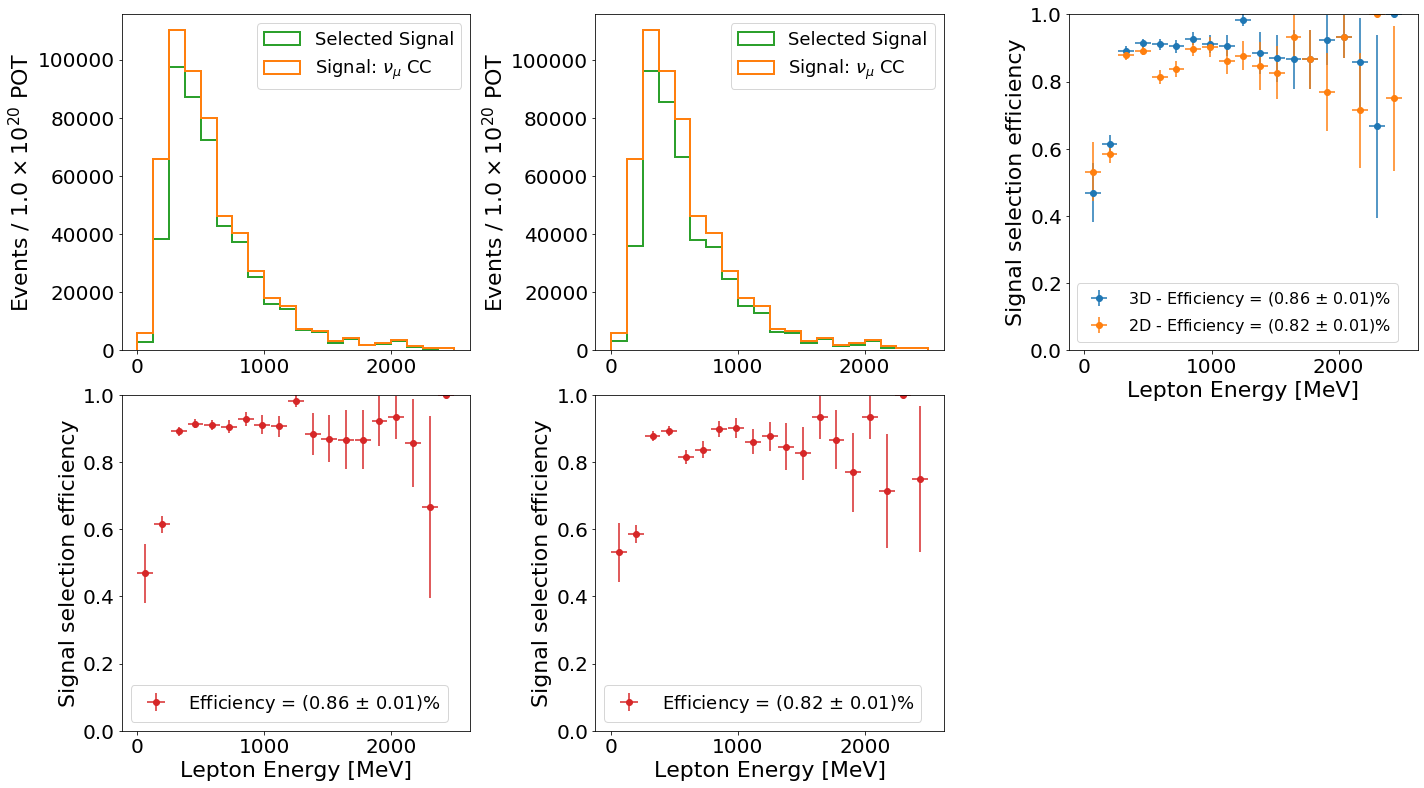

Plotting numu_cc with variable lep_costheta
Overall efficiency - 3D: 0.8588661037394452
Overall efficiency - 2D: 0.8230800160836349


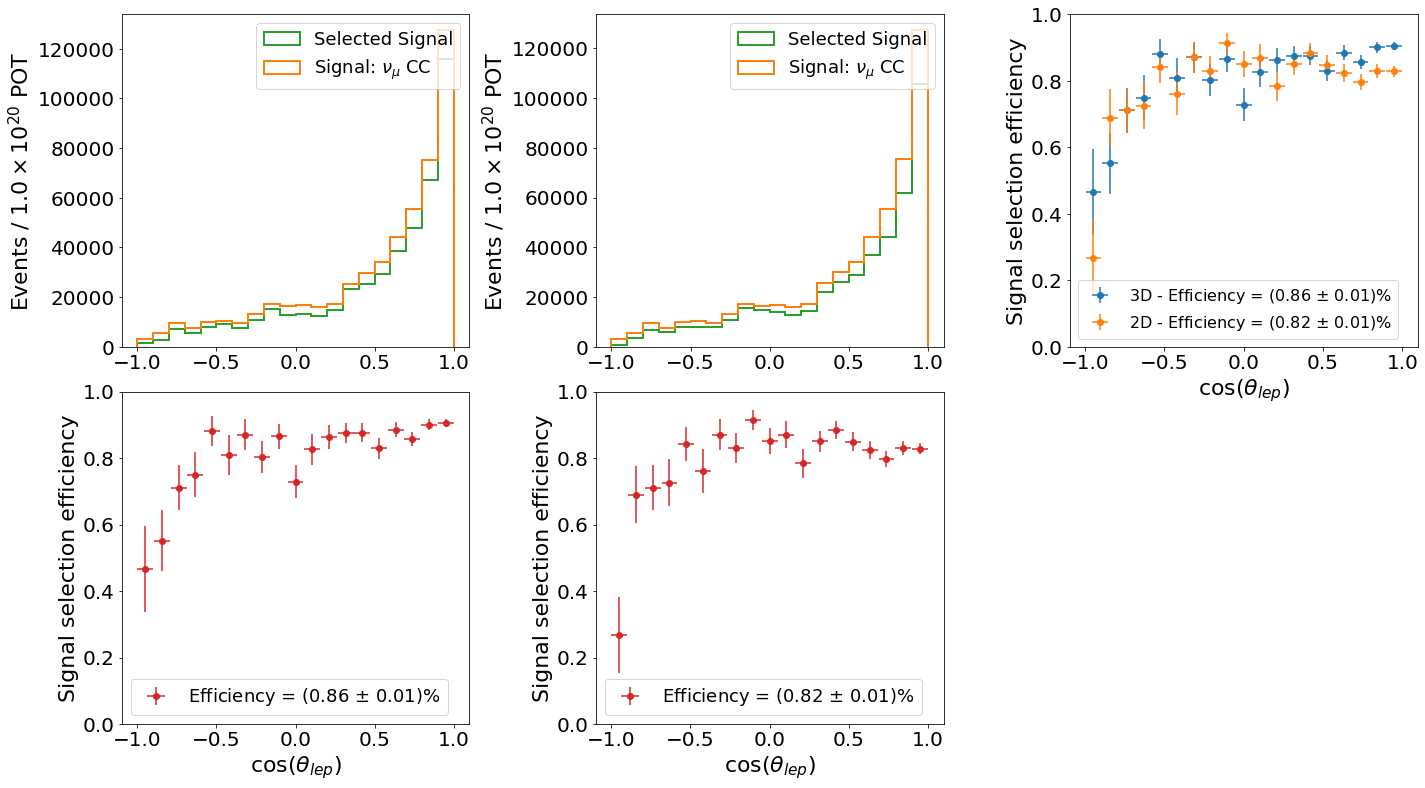

Plotting numu_cc with variable lep_thetayz
Overall efficiency - 3D: 0.8588661037394452
Overall efficiency - 2D: 0.8230800160836349


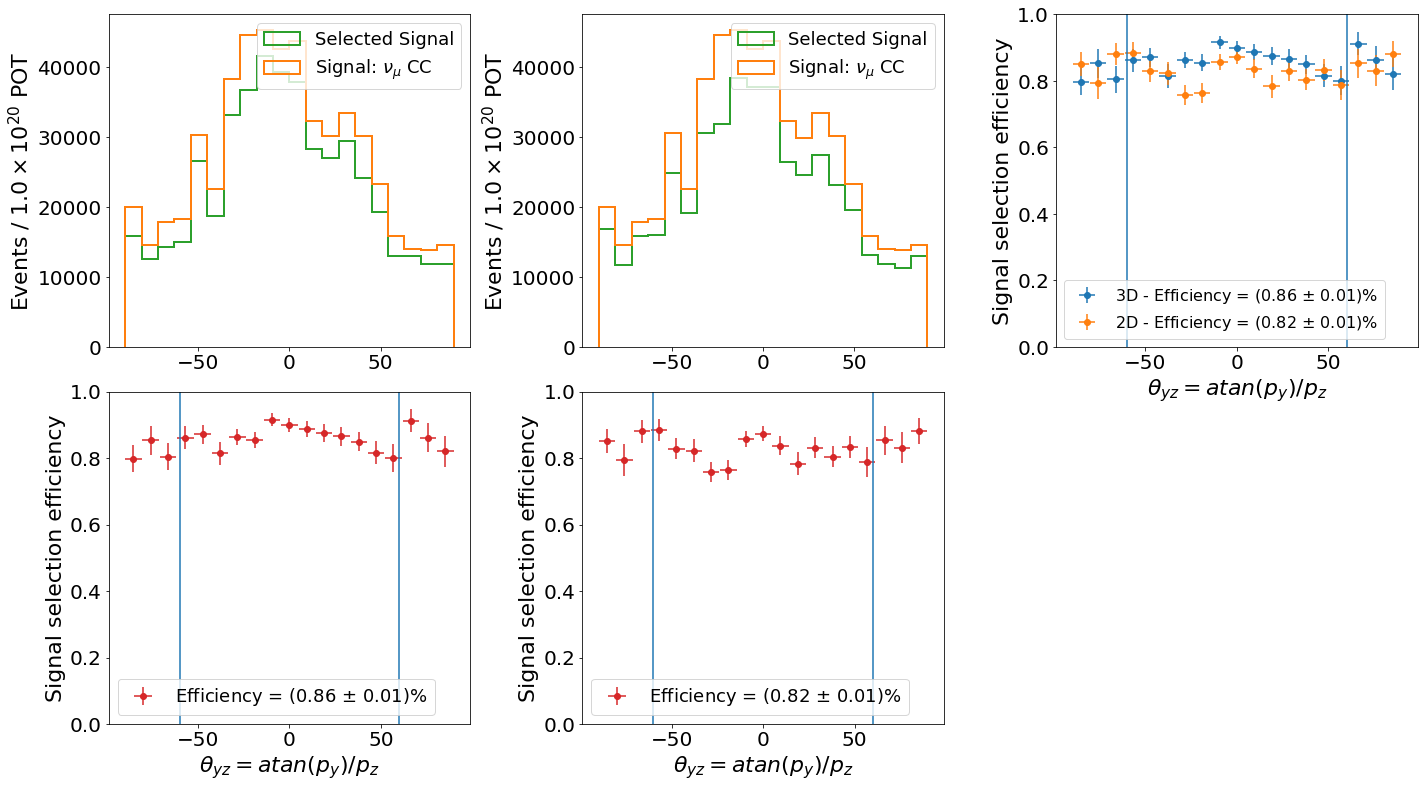

In [47]:
# https://stackoverflow.com/questions/35988/c-like-structures-in-python/31062667
from dataclasses import dataclass

@dataclass
class Variable:
    variable: str = 'lep_e'
    xlabel: str = 'Lepton Energy [MeV]'
    x_1: float = 0.0
    x_2: float = 2500.

all_vars = {
    'lep_p':               Variable(variable = 'lep_e', xlabel = 'Lepton Energy [MeV]', x_1 = 0.0, x_2 = 2500.),
    'lep_costheta':        Variable(variable = 'lep_costheta', xlabel = 'cos($\\theta_{lep}$)', x_1 = -1., x_2 = 1.),
    'lep_thetayz':         Variable(variable = 'lep_thetayz', xlabel = r'$\theta_{yz} = atan(p_y)/p_z$', x_1 = -90, x_2 = 90.),
    'lead_prot_p':         Variable(variable = 'lead_prot_p', xlabel = 'Leading Proton Momentum [MeV]', x_1 = 0., x_2 = 2000.),
    'lead_prot_costheta':  Variable(variable = 'lead_prot_costheta', xlabel = 'Leading Proton cos($\\theta_p$)', x_1 = 0., x_2 = 2000.),
}


categories = [
    {
        'name'       : "nue_cc",
        'signal'     : "true_neutrinoid == 0",
        'signal_sel' : "true_neutrinoid == 0 and pred_neutrinoid == 0",
        'var'        : [all_vars['lep_p'], all_vars['lep_costheta'], all_vars['lep_thetayz']],
        'label'      : r"$\nu_e$ CC",
        'nbins'      : 20
    },
    {
        'name'       : "numu_cc",
        'signal'     : "true_neutrinoid == 1",
        'signal_sel' : "true_neutrinoid == 1 and pred_neutrinoid == 1",
        'var'        : [all_vars['lep_p'], all_vars['lep_costheta'], all_vars['lep_thetayz']],
        'label'      : r"$\nu_{\mu}$ CC",
        'nbins'      : 20
    },
    {
        'name'       : "nue_cc_0p",
        'signal'     : "true_neutrinoid == 0 and true_prot == 0",
        'signal_sel' : "true_neutrinoid == 0 and true_prot == 0 and pred_neutrinoid == 0 and pred_prot == 0",
        'var'        : [all_vars['lep_p'], all_vars['lep_costheta']],
        'label'      : r"$\nu_e CC$, $N_{p} = 0$",
        'nbins'      : 20
    },
    {
        'name'       : "nue_cc_1p",
        'signal'     : "true_neutrinoid == 0 and true_prot == 1",
        'signal_sel' : "true_neutrinoid == 0 and true_prot == 1 and pred_neutrinoid == 0 and pred_prot == 1",
        'var'        : [all_vars['lep_p'], all_vars['lep_costheta'], all_vars['lead_prot_p'], all_vars['lead_prot_costheta']],
        'label'      : r"$\nu_e$ CC, $N_{p} = 1$",
        'nbins'      : 20
    },
    {
        'name'       : "nue_cc_2p",
        'signal'     : "true_neutrinoid == 0 and true_prot == 2",
        'signal_sel' : "true_neutrinoid == 0 and true_prot == 2 and pred_neutrinoid == 0 and pred_prot == 2",
        'var'        : [all_vars['lep_p'], all_vars['lep_costheta'], all_vars['lead_prot_p'], all_vars['lead_prot_costheta']],
        'label'      : r"$\nu_e$ CC, $N_{p} > 1$",
        'nbins'      : 20
    },
    {
        'name'       : "nue_cc_1pi0",
        'signal'     : "true_neutrinoid == 0 and true_npi == 1",
        'signal_sel' : "true_neutrinoid == 0 and true_npi == 1 and pred_neutrinoid == 0 and pred_npi == 1",
        'var'        : [all_vars['lep_p'], all_vars['lep_costheta']],
        'label'      : r"$\nu_e$ CC, $N_{\pi^0} = 1$",
        'nbins'      : 8
    }
]


c = categories[1]
for v in c['var']:
    print ('Plotting', c['name'], 'with variable', v.variable)    
    make_plots(c['name'], c['label'], v, c['signal'], c['signal_sel'], c['nbins'], df_3d, df_2d)
